# Simple neural network: Default of Credit card clients

## Context:

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

## About the dataset:
There are 25 variables:

* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
* default.payment.next.month: Default payment (1=yes, 0=no)

In [1]:
# Import libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format
warnings.filterwarnings('ignore')

# Edit pandas display option to show more rows and columns:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
# Load the dataset:
df = pd.read_csv('UCI_Credit_Card.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.000,2,2,1,24,2,2,-1,-1,-2,-2,3913.000,3102.000,689.000,0.000,0.000,0.000,0.000,689.000,0.000,0.000,0.000,0.000,1
1,2,120000.000,2,2,2,26,-1,2,0,0,0,2,2682.000,1725.000,2682.000,3272.000,3455.000,3261.000,0.000,1000.000,1000.000,1000.000,0.000,2000.000,1
2,3,90000.000,2,2,2,34,0,0,0,0,0,0,29239.000,14027.000,13559.000,14331.000,14948.000,15549.000,1518.000,1500.000,1000.000,1000.000,1000.000,5000.000,0
3,4,50000.000,2,2,1,37,0,0,0,0,0,0,46990.000,48233.000,49291.000,28314.000,28959.000,29547.000,2000.000,2019.000,1200.000,1100.000,1069.000,1000.000,0
4,5,50000.000,1,2,1,57,-1,0,-1,0,0,0,8617.000,5670.000,35835.000,20940.000,19146.000,19131.000,2000.000,36681.000,10000.000,9000.000,689.000,679.000,0


In [3]:
print('The shape of the dataframe is {}'.format(df.shape))

The shape of the dataframe is (30000, 25)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

In [5]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000
mean,15000.500,167484.323,1.604,1.853,1.552,35.486,-0.017,-0.134,-0.166,-0.221,-0.266,-0.291,51223.331,49179.075,47013.155,43262.949,40311.401,38871.760,5663.581,5921.163,5225.681,4826.077,4799.388,5215.503,0.221
std,8660.398,129747.662,0.489,0.790,0.522,9.218,1.124,1.197,1.197,1.169,1.133,1.150,73635.861,71173.769,69349.387,64332.856,60797.156,59554.108,16563.280,23040.870,17606.961,15666.160,15278.306,17777.466,0.415
min,1.000,10000.000,1.000,0.000,0.000,21.000,-2.000,-2.000,-2.000,-2.000,-2.000,-2.000,-165580.000,-69777.000,-157264.000,-170000.000,-81334.000,-339603.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,7500.750,50000.000,1.000,1.000,1.000,28.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,3558.750,2984.750,2666.250,2326.750,1763.000,1256.000,1000.000,833.000,390.000,296.000,252.500,117.750,0.000
50%,15000.500,140000.000,2.000,2.000,2.000,34.000,0.000,0.000,0.000,0.000,0.000,0.000,22381.500,21200.000,20088.500,19052.000,18104.500,17071.000,2100.000,2009.000,1800.000,1500.000,1500.000,1500.000,0.000
75%,22500.250,240000.000,2.000,2.000,2.000,41.000,0.000,0.000,0.000,0.000,0.000,0.000,67091.000,64006.250,60164.750,54506.000,50190.500,49198.250,5006.000,5000.000,4505.000,4013.250,4031.500,4000.000,0.000
max,30000.000,1000000.000,2.000,6.000,3.000,79.000,8.000,8.000,8.000,8.000,8.000,8.000,964511.000,983931.000,1664089.000,891586.000,927171.000,961664.000,873552.000,1684259.000,896040.000,621000.000,426529.000,528666.000,1.000


In [6]:
# Let's rename the target variable as it's too long:
df = df.rename(columns={'default.payment.next.month': 'Default'})

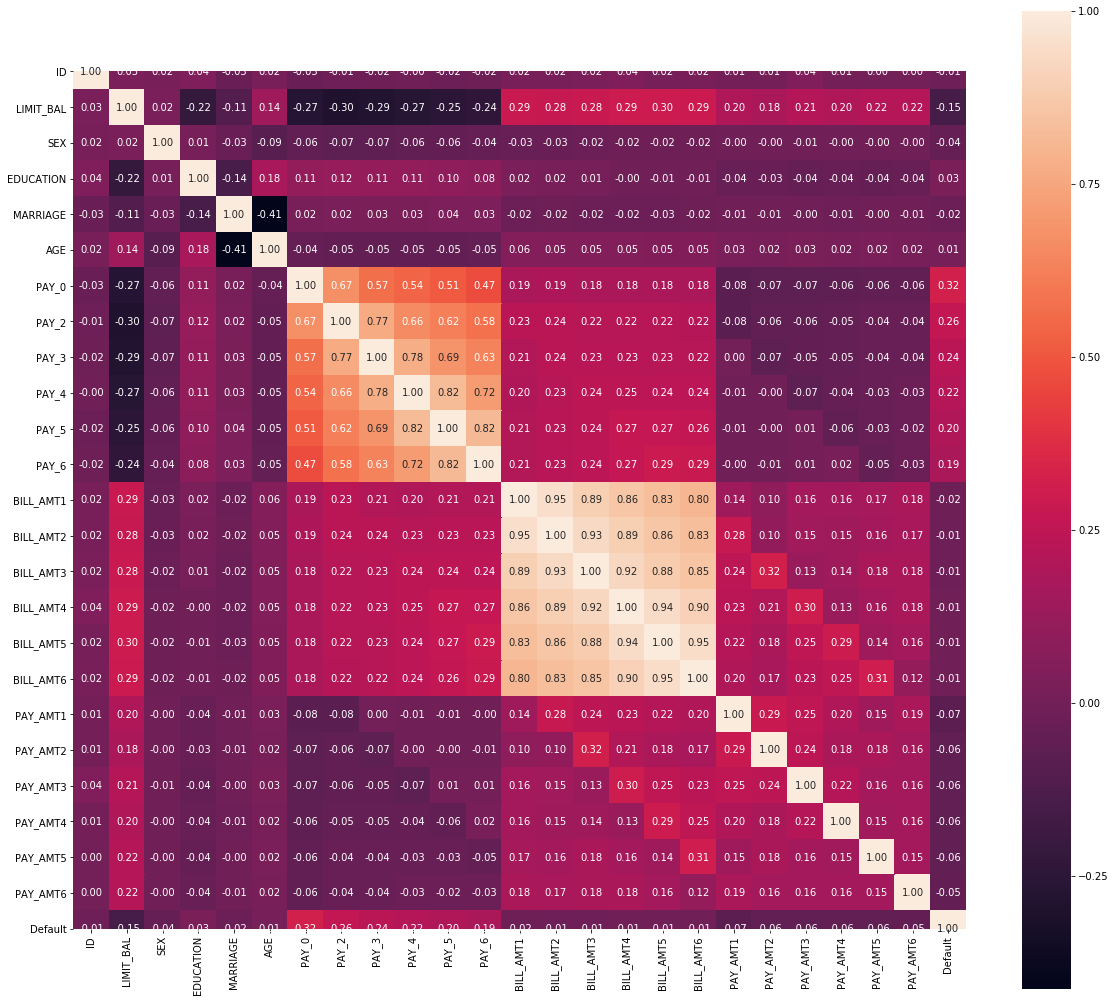

In [7]:
# Plot correlation matrix:
corr_matrix = df.corr()

plt.figure(figsize=(20,18))
sns.heatmap(corr_matrix, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})
plt.show()

In [8]:
# Eliminate multicollinearity:
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 80%:
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
print(to_drop)

['PAY_5', 'PAY_6', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']


In [9]:
# Drop highly correlated features:
df = df.drop(df[to_drop], axis=1)

print('The shape of the dataframe after dropping columns is {}'.format(df.shape))

The shape of the dataframe after dropping columns is (30000, 18)


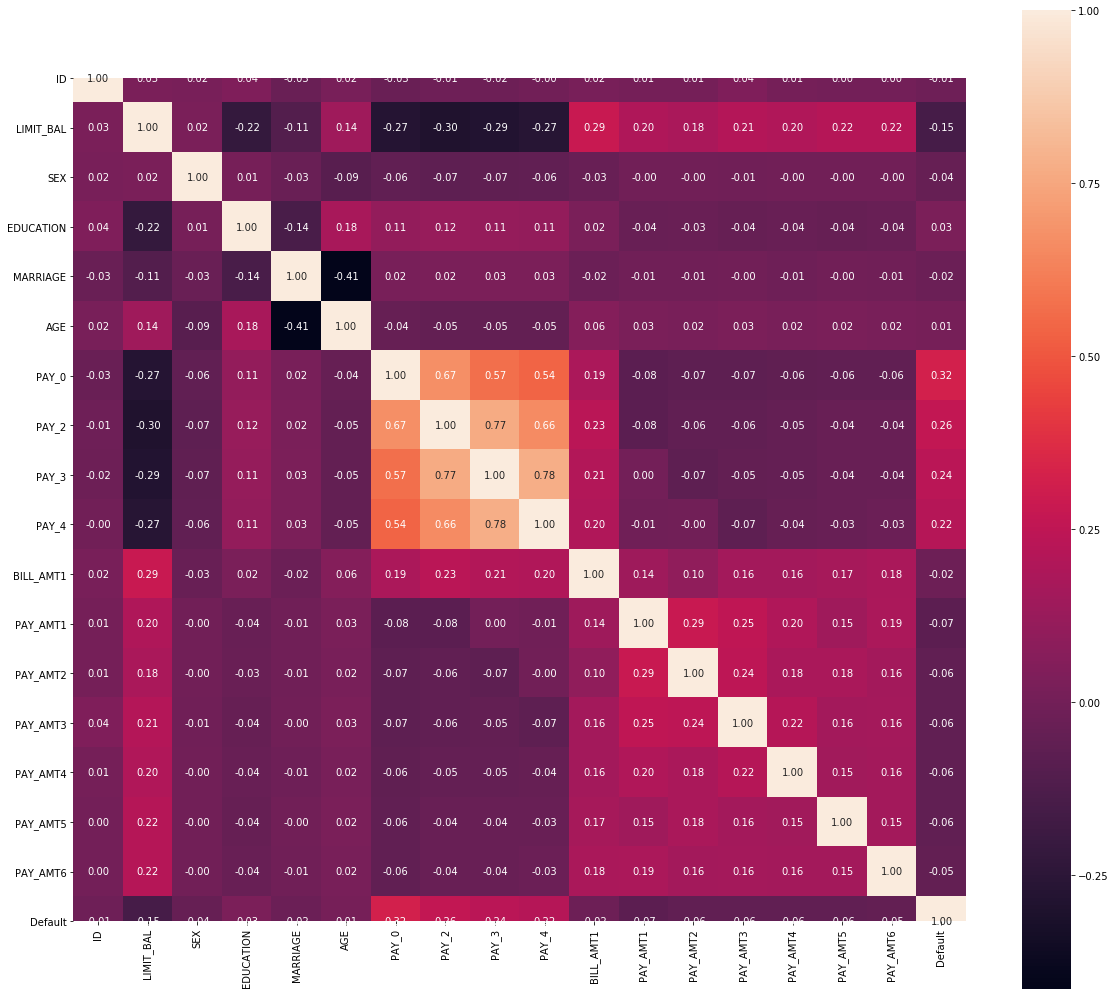

In [10]:
# Correlation matrix after dropping columns:
corr_matrix = df.corr()

plt.figure(figsize=(20,18))
sns.heatmap(corr_matrix, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})
plt.show()

In [11]:
# Separate the dataset:
X = df.drop('Default', axis=1)
y = df['Default']

print(X.shape)
print(y.shape)

(30000, 17)
(30000,)


In [12]:
# Split the data into train and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(24000, 17) (6000, 17)
(24000,) (6000,)


In [13]:
# Scale the dataset using Robust scaler:
scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# Build the model:
# Random forest classifier:

rfc = RandomForestClassifier(n_estimators=150, random_state=123)

%timeit rfc.fit(X_train, y_train)

y_preds_train = rfc.predict(X_train)
y_preds_test = rfc.predict(X_test)

print('Accuracy of the model in training set is: {:.3f}'.format(accuracy_score(y_train, y_preds_train)))
print('Accuracy of the model in test set is: {:.3f}'.format(accuracy_score(y_test, y_preds_test)))

11.9 s ± 404 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Accuracy of the model in training set is: 1.000
Accuracy of the model in test set is: 0.819


In [16]:
# Neural network:
mlp = MLPClassifier(hidden_layer_sizes=(100,4))

%timeit mlp.fit(X_train, y_train)

y_preds_train = mlp.predict(X_train)
y_preds_test = mlp.predict(X_test)

print('Accuracy of the model in training set is: {:.3f}'.format(accuracy_score(y_train, y_preds_train)))
print('Accuracy of the model in test set is: {:.3f}'.format(accuracy_score(y_test, y_preds_test)))

38.3 s ± 3.08 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
Accuracy of the model in training set is: 0.835
Accuracy of the model in test set is: 0.816


In [18]:
# Neural network:
mlp = MLPClassifier(hidden_layer_sizes=(1000,))

%timeit mlp.fit(X_train, y_train)

y_preds_train = mlp.predict(X_train)
y_preds_test = mlp.predict(X_test)

print('Accuracy of the model in training set is: {:.3f}'.format(accuracy_score(y_train, y_preds_train)))
print('Accuracy of the model in test set is: {:.3f}'.format(accuracy_score(y_test, y_preds_test)))

3min 4s ± 16.3 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
Accuracy of the model in training set is: 0.879
Accuracy of the model in test set is: 0.803


It looks like random forest classifier gave us a higher accuracy score and took the leaset amount of time to execute. However, random forest tends to overfit the dataset.